# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [3]:
#!pip install seaborn

In [31]:
#!pip install scikit-learn

In [4]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.16.1


In [5]:
import numpy as np

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.

In [6]:
dataset_path = keras.utils.get_file("auto-mpg.data",
                                    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

      0/Unknown 0s 0s/step

'C:\\Users\\igbopa\\.keras\\datasets\\auto-mpg.data'

In [7]:
pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep="\t")

,18.0 8 307.0 130.0 3504. 12.0 70 1,chevrolet chevelle malibu
0,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
1,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
2,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
3,17.0 8 302.0 140.0 3449. 10...,ford torino
4,15.0 8 429.0 198.0 4341. 10...,ford galaxie 500
...,...,...
392,27.0 4 140.0 86.00 2790. 15...,ford mustang gl
393,44.0 4 97.00 52.00 2130. 24...,vw pickup
394,32.0 4 135.0 84.00 2295. 11...,dodge rampage
395,28.0 4 120.0 79.00 2625. 18...,ford ranger


Importelo usando pandas.

In [8]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [16]:
# raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values='?', sep= ' ', comment = '\t', skipinitialspace = True)
# raw_dataset

In [9]:
raw_dataset = pd.read_fwf(dataset_path, names = column_names)
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [10]:
dataset = raw_dataset.copy()

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [14]:
# describe include all
dataset.describe(include='all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,"""ford pinto"""
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


### Limpia los datos

Trata los missings y variables categóricas

In [16]:
# suma de los nans
(dataset.isna().sum())

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

In [17]:
# buscar el valor anomalo en la columna Horsepower
dataset[dataset['Horsepower'] == '?']

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [19]:
# eliminar las columnas con este valor anomalo y conviertela a float
dataset['Horsepower'] = pd.to_numeric(dataset['Horsepower'], errors='coerce')

dataset.dropna(subset=['Horsepower'], inplace=True)

dataset['Horsepower'] = dataset['Horsepower'].astype(float)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
 8   Car Name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [21]:
# drop car name, el name no suele ser buena columna...
dataset.drop(columns=['Car Name'], inplace=True)

In [22]:
origin = dataset.pop('Origin')


In [23]:


(origin == 1)

0       True
1       True
2       True
3       True
4       True
       ...  
393     True
394    False
395     True
396     True
397     True
Name: Origin, Length: 392, dtype: bool

In [24]:
# se puede hacer con get_dummies

dataset['USA'] = (origin == 1).astype("int")
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1

In [25]:
dataset.Cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [26]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [28]:
train_dataset = dataset.sample(frac=0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, 1:], dataset.iloc[:, 0])

In [35]:
y_train

210    19.0
331    33.8
37     18.0
391    36.0
360    30.7
       ... 
283    20.2
157    15.0
352    29.9
191    22.0
247    39.4
Name: MPG, Length: 294, dtype: float64

### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

In [36]:
# columnas de train
X_train.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

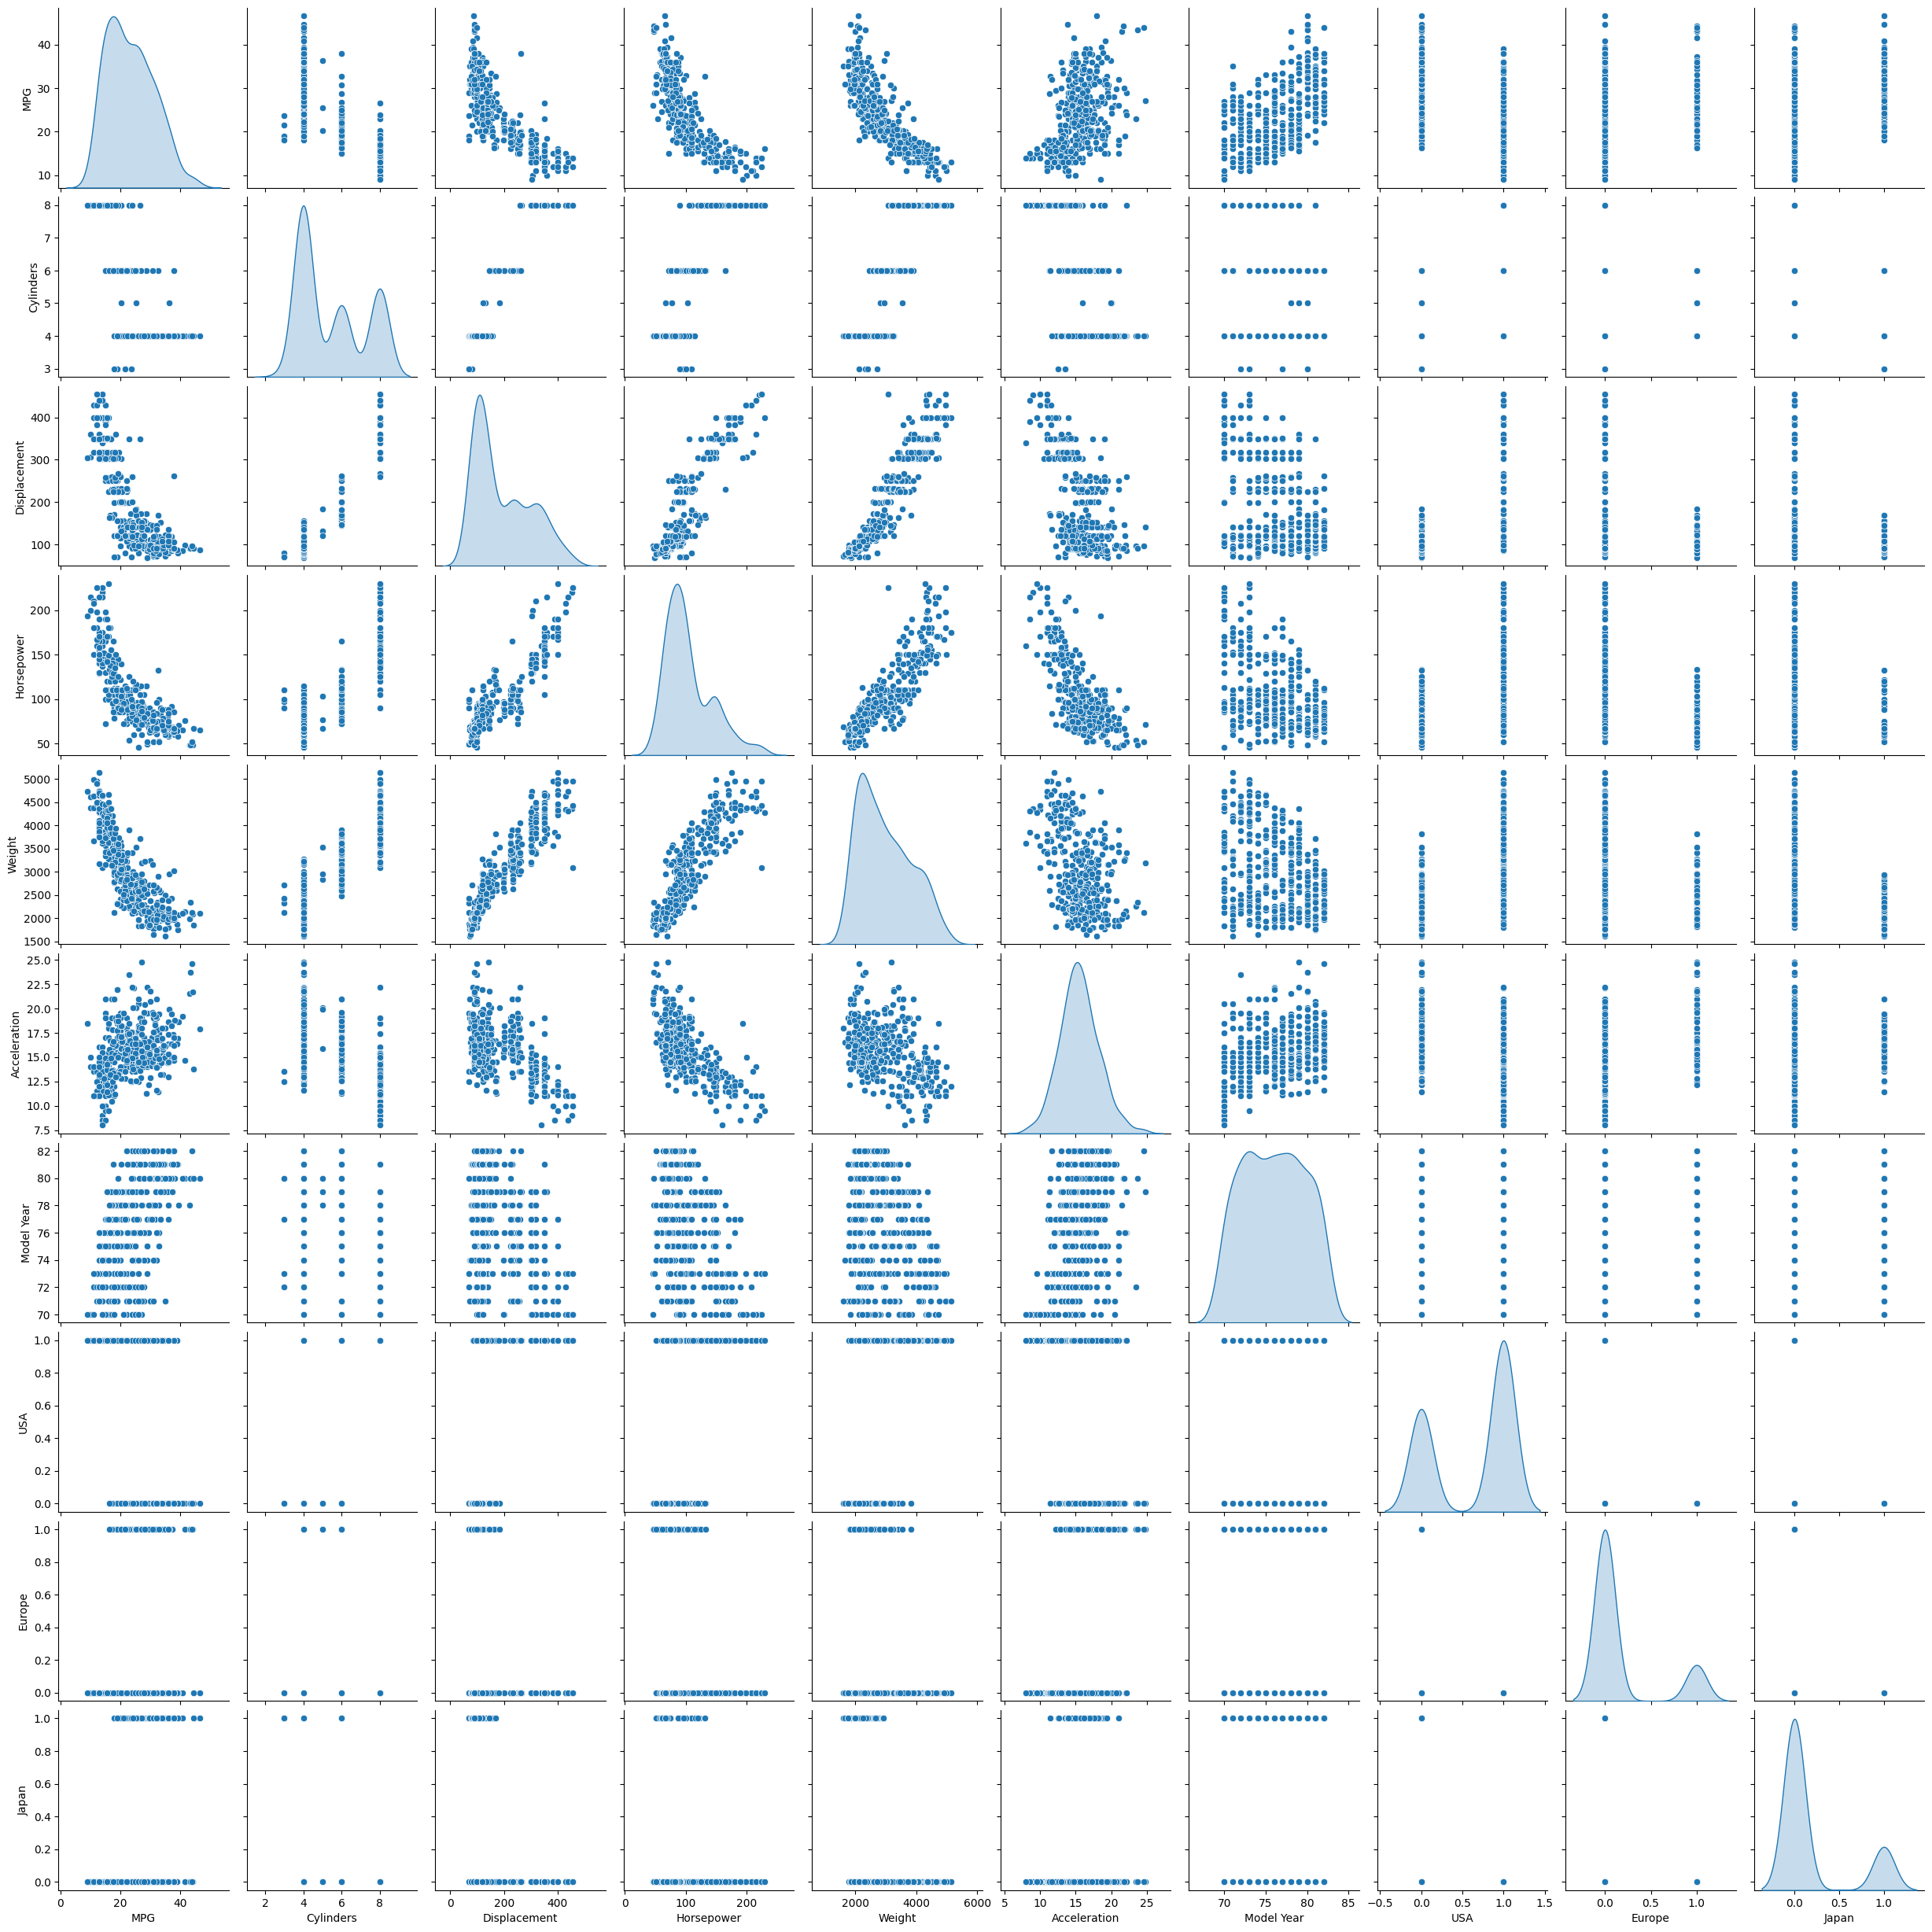

In [37]:
# pairplot , diag_kind = 'kde'
sns.pairplot(dataset, diag_kind='kde')

Tambien revise las estadisticas generales:

In [38]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [39]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


### Separa las features del target

Separe el target de las features.

In [40]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [41]:
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']

from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
st_scaler.fit(train_dataset)

normed_train_data = st_scaler.transform(train_dataset)
normed_test_data = st_scaler.transform(test_dataset)

#normed_train_data = norm(train_dataset)
#normed_test_data = norm(test_dataset)

print(normed_train_data.shape)
print(normed_test_data.shape)

# Podemos utilizar scalados de sklearn

(314, 9)
(78, 9)


In [42]:
normed_train_data

array([[-0.87073567, -1.01107037, -0.78530384, ...,  0.77591289,
        -0.46589083, -0.49601587],
       [-0.87073567, -0.53106418, -0.44351791, ...,  0.77591289,
        -0.46589083, -0.49601587],
       [ 1.48625572,  1.48496183,  1.44945034, ...,  0.77591289,
        -0.46589083, -0.49601587],
       ...,
       [-0.87073567, -0.83826814, -0.31206178, ..., -1.28880447,
        -0.46589083,  2.01606452],
       [-0.87073567, -1.07827123, -1.153381  , ..., -1.28880447,
        -0.46589083,  2.01606452],
       [-0.87073567, -0.84786826, -0.49610036, ..., -1.28880447,
         2.1464256 , -0.49601587]])

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [43]:
normed_train_data

array([[-0.87073567, -1.01107037, -0.78530384, ...,  0.77591289,
        -0.46589083, -0.49601587],
       [-0.87073567, -0.53106418, -0.44351791, ...,  0.77591289,
        -0.46589083, -0.49601587],
       [ 1.48625572,  1.48496183,  1.44945034, ...,  0.77591289,
        -0.46589083, -0.49601587],
       ...,
       [-0.87073567, -0.83826814, -0.31206178, ..., -1.28880447,
        -0.46589083,  2.01606452],
       [-0.87073567, -1.07827123, -1.153381  , ..., -1.28880447,
        -0.46589083,  2.01606452],
       [-0.87073567, -0.84786826, -0.49610036, ..., -1.28880447,
         2.1464256 , -0.49601587]])

In [44]:
normed_train_data.shape

(314, 9)

In [ ]:
# modelo secuencial

# dos capas con 64 y una densa de salida para regresion

# compilamos con mse, adam y metricas mae y mse

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(dataset.columns) - 1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona para regresión
])

c:\Users\igbopa\AppData\Local\miniconda3\envs\Deep_Learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse'])

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [ ]:
# model fit
# con normed_train_data y train_labels, epocas 1000, validation_split 0.2

In [50]:
history = model.fit(normed_train_data, train_labels, epochs=1000, validation_split=0.2)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 567.8052 - mae: 22.6536 - mse: 567.8052 - val_loss: 561.4810 - val_mae: 22.4971 - val_mse: 561.4810
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 533.8486 - mae: 21.9017 - mse: 533.8486 - val_loss: 510.9860 - val_mae: 21.4274 - val_mse: 510.9860
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 480.6405 - mae: 20.8058 - mse: 480.6405 - val_loss: 456.0098 - val_mae: 20.2075 - val_mse: 456.0098
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 440.1685 - mae: 19.7171 - mse: 440.1685 - val_loss: 396.2821 - val_mae: 18.8018 - val_mse: 396.2821
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 379.0150 - mae: 18.3519 - mse: 379.0150 - val_loss: 333.4223 - val_mae: 17.1938 - val_mse: 333.4223
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 312.3446 - mae: 16.6935 - mse: 312.3446 - val_loss: 269.3708 - val_mae: 15.3765 - val_mse: 269.3708
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step -

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [51]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,574.908325,22.769573,574.908325,561.480957,22.497059,561.480957,0
1,522.984680,21.685457,522.984680,510.985962,21.427404,510.985962,1
2,474.217743,20.622440,474.217743,456.009796,20.207466,456.009796,2
3,420.523193,19.386375,420.523193,396.282135,18.801804,396.282135,3
4,363.302307,17.996502,363.302307,333.422302,17.193754,333.422302,4
...,...,...,...,...,...,...,...
995,1.936281,0.856737,1.936281,9.018761,2.332759,9.018761,995
996,2.097409,0.918490,2.097409,8.429189,2.278582,8.429189,996
997,2.238563,0.954059,2.238563,8.321596,2.307562,8.321596,997
998,2.178523,0.908129,2.178523,8.036671,2.258729,8.036671,998


In [52]:
df_hist.head(50)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,574.908325,22.769573,574.908325,561.480957,22.497059,561.480957,0
1,522.984680,21.685457,522.984680,510.985962,21.427404,510.985962,1
2,474.217743,20.622440,474.217743,456.009796,20.207466,456.009796,2
3,420.523193,19.386375,420.523193,396.282135,18.801804,396.282135,3
4,363.302307,17.996502,363.302307,333.422302,17.193754,333.422302,4
5,303.788422,16.415018,303.788422,269.370789,15.376550,269.370789,5
6,244.965637,14.652162,244.965637,209.330017,13.418305,209.330017,6
7,189.369308,12.751616,189.369308,152.970459,11.268875,152.970459,7
8,138.553894,10.714934,138.553894,105.071388,9.072076,105.071388,8
9,96.423676,8.673658,96.423676,69.755676,7.151727,69.755676,9


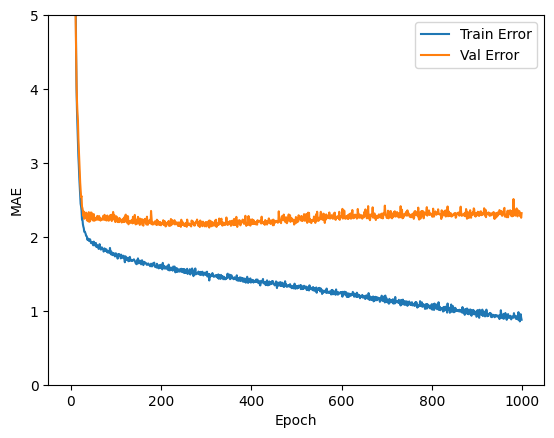

In [54]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
plt.ylim([0,5])

plt.legend()

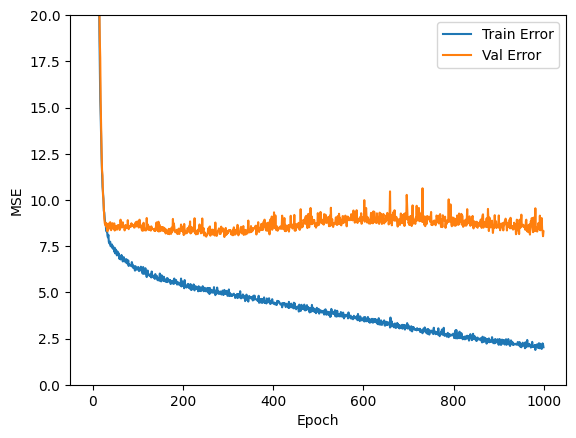

In [55]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
plt.ylim([0,20])
plt.legend()

In [56]:
def plot_history(history, ylim1=(0,20), ylim2=(0,20)):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
    plt.ylim(ylim1)
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
    plt.ylim(ylim2)
    plt.legend()

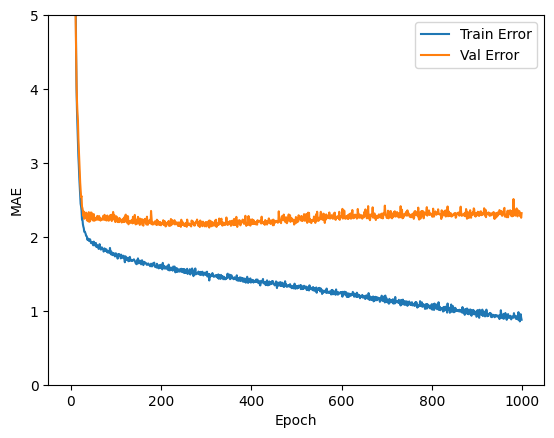

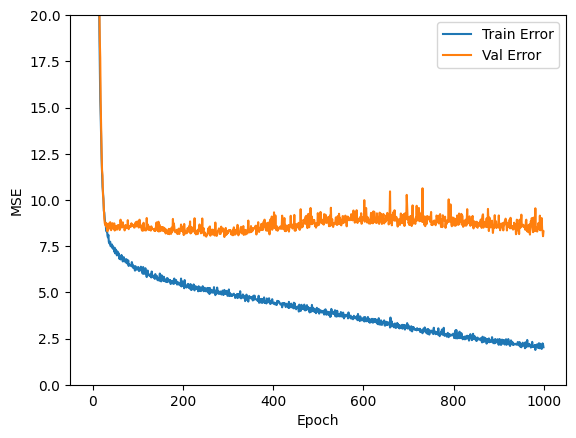

In [57]:
plot_history(history, ylim1 = (0,5))

¿Alguna conclusión respecto a este gráfico?

# BONUS TRACK!!
Investigadme esto

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Después del entrenamiento utiliza la función del apartado anterior `plot_history(history)`.

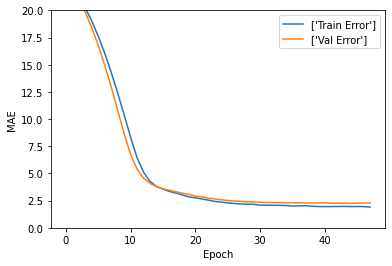

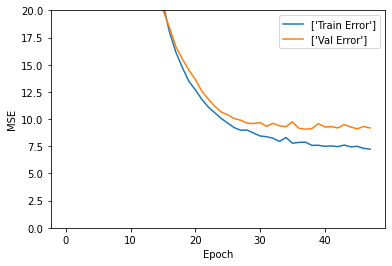

In [52]:
# HAY QUE REPETIR EL MODELO PERO CON EARLY STOPPING Y  PATIENCE 10
# [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
plot_history(history)

# SE ACABO EL BONUS TRACK, ESTO SI!!!

Interpreta el gráfico

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [58]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels)
mae

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.4097 - mae: 1.9276 - mse: 6.4097 


1.9813790321350098

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2_score(test_labels, model.predict(normed_test_data))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


0.8985645154452641

In [61]:
model.save("my_keras_model_MAE_1_96.h5")

Ahora prueba el modelo. Coge 10 ejemplos de train y llama a` model.predict`.

In [62]:
result_10 = model.predict(normed_train_data[:10])
result_10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[27.04726 ],
       [23.086828],
       [12.214712],
       [37.351284],
       [35.565678],
       [19.198086],
       [37.7102  ],
       [29.443832],
       [20.146116],
       [21.189875]], dtype=float32)

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


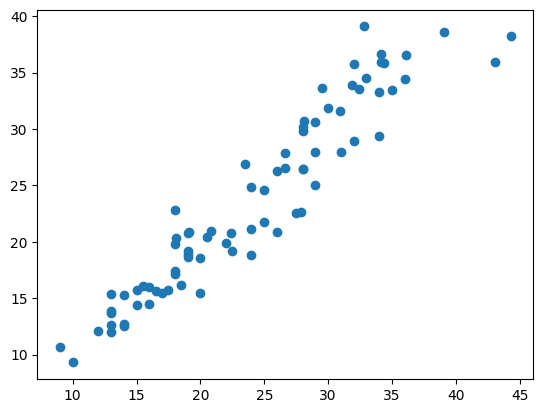

In [64]:
test_predictions =  model.predict(normed_test_data)
plt.scatter(test_labels, test_predictions)

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

In [ ]:
error = test_predictions - test_labels

plt.hist(error)

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

## Conclusion

Este cuaderno introdujo algunas técnicas para manejar un problema de regresión.

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión (se utilizan diferentes funciones de pérdida para problemas de clasificación).
* Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* La detención temprana es una técnica útil para evitar el sobreajuste.

In [58]:
model_loaded = keras.models.load_model("my_keras_model_MAE_1_96.h5")

test_predictions = model_loaded.predict(normed_test_data).flatten()

In [59]:
test_predictions

array([15.724552 , 11.683048 , 12.47341  , 23.602165 , 21.050465 ,
       13.462151 , 13.192361 , 13.379283 , 19.690887 , 30.02945  ,
       25.153633 , 24.985764 , 14.308925 , 25.710617 , 12.290881 ,
       13.581768 , 14.205824 , 13.1787195, 18.890953 , 12.687322 ,
       12.934426 , 25.826237 , 19.114384 , 20.23384  , 30.077175 ,
       23.496483 , 15.980178 , 23.140163 , 16.474903 , 20.652336 ,
       28.213821 , 21.355206 , 18.866337 , 21.765427 , 26.150589 ,
       15.740327 , 19.379036 , 32.69873  , 30.529648 , 17.15385  ,
       31.238178 , 29.412548 , 15.778153 , 35.69676  , 34.388645 ,
       35.85762  , 20.508686 , 22.531406 , 20.841087 , 26.521431 ,
       30.363766 , 19.66843  , 32.53331  , 18.567234 , 17.504608 ,
       17.673996 , 33.953976 , 35.18694  , 22.246986 , 24.395443 ,
       38.045296 , 33.432056 , 28.231087 , 28.207329 , 32.5648   ,
       39.756073 , 37.1423   , 36.268513 , 34.033016 , 29.40741  ,
       22.342922 , 21.964573 , 29.8344   , 31.03479  , 36.1142